In [66]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [67]:
ds = xr.open_dataset('noaav4_nh_monthly_sic_1978_2024.nc')
ds

<xarray.Dataset> Size: 2GB
Dimensions:                                 (time: 545, lat: 448, lon: 304)
Coordinates:
  * time                                    (time) datetime64[ns] 4kB 1978-11...
  * lon                                     (lon) float64 2kB -180.0 ... 180.0
  * lat                                     (lat) float64 4kB 31.35 ... 90.0
Data variables:
    monthly_sic                             (time, lat, lon) float32 297MB ...
    melt_onset_day_cdr_seaice_conc_monthly  (time, lat, lon) float32 297MB ...
    nsidc_bt_seaice_conc_monthly            (time, lat, lon) float32 297MB ...
    nsidc_nt_seaice_conc_monthly            (time, lat, lon) float32 297MB ...
    projection                              (time) |S1 545B ...
    qa_of_cdr_seaice_conc_monthly           (time, lat, lon) float32 297MB ...
    stdev_of_cdr_seaice_conc_monthly        (time, lat, lon) float32 297MB ...
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc_monthly
    metadata_link:             https://nsidc.org/data/g02202/versions/4/
    ...                        ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-22T16:08:07Z
    time_coverage_start:       1987-04-01T00:00:00Z
    time_coverage_end:         1987-04-30T23:59:59Z
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...

In [68]:
# Get the climatology
# sic = ds['monthly_sic'].mean(dim='time')

# Select the first month
sic = ds['monthly_sic'].isel(time=0)

# Get the land mask
sic_masked = sic.where(sic <= 1.0)
sic_nan = sic.where(sic > 1.0)

(448, 304)

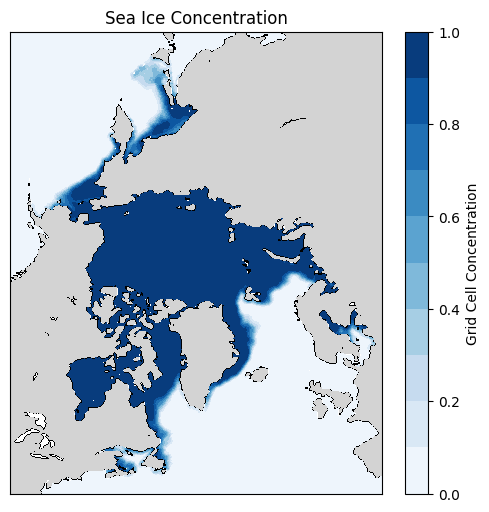

In [127]:
# Plot the sea ice concentration
plt.figure(figsize=(6, 6))

# Add the sea ice concentration
plt.contourf(sic_masked, levels=np.linspace(0, 1, 11), cmap='Blues', origin='upper')

# Add a colorbar
plt.colorbar(label='Grid Cell Concentration')

# Remove x and y labels
plt.gca().set_xticks([])
plt.gca().set_yticks([])

# Add a custom colormap for the land and other mask values
custom_cmap = ListedColormap(['white', 'k', 'k', 'lightgrey'])

# Add the land and other mask values
plt.contourf(sic_nan, levels=4, cmap=custom_cmap, origin='upper')

# Add a title
plt.title('Sea Ice Concentration')

# Show the plot
plt.show()